## 0. Importing all dependencies

In [13]:
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [14]:
%pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [15]:
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sb

## 1. Task 1a (ship dataset)
#### 1.1. Loading the dataset

Checking the integrity of the dataset, we can see that there are no duplicates or empty rows

In [4]:
df_raw = pd.read_csv('ships.csv')
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Company_Name  200 non-null    object
 1   ship_name     200 non-null    object
 2   built_year    200 non-null    int64 
 3   gt            200 non-null    int64 
 4   dwt           200 non-null    int64 
 5   length        200 non-null    int64 
 6   width         200 non-null    int64 
dtypes: int64(5), object(2)
memory usage: 11.1+ KB


In [5]:
df = df_raw.dropna().drop_duplicates()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Company_Name  200 non-null    object
 1   ship_name     200 non-null    object
 2   built_year    200 non-null    int64 
 3   gt            200 non-null    int64 
 4   dwt           200 non-null    int64 
 5   length        200 non-null    int64 
 6   width         200 non-null    int64 
dtypes: int64(5), object(2)
memory usage: 11.1+ KB


In [6]:
df.head()

,Company_Name,ship_name,built_year,gt,dwt,length,width
0,PRELUDE,Offshore Support Vessel,2017,499167,394330,489,74
1,MSC LORETO,Container Ship,2023,236184,240000,399,60
2,MSC FEBE,Container Ship,2019,232618,228149,400,62
3,MSC ARINA,Container Ship,2019,228741,228111,400,61
4,EVER GOVERN,Container Ship,2019,219688,198937,400,59


#### 1.2. Drawing plots

<Axes: xlabel='Length (m)', ylabel='Dead Weight Tonnage (t)'>

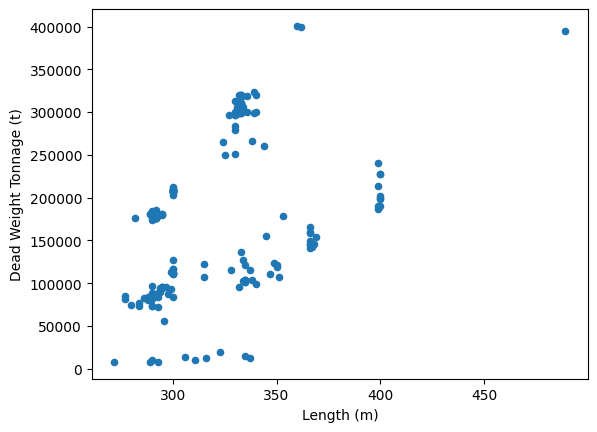

In [7]:
df.plot(x="length", y="dwt", kind="scatter", xlabel='Length (m)', ylabel='Dead Weight Tonnage (t)')

/var/folders/bl/2t5_2t2x49z7c85rxkgl899r0000gn/T/ipykernel_36720/2380484766.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  sum_of_small_cats += ship_type_freq[i]


<Axes: >

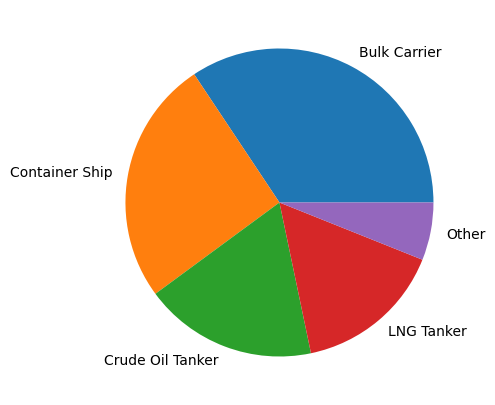

In [ ]:
ship_type_freq = df['ship_name'].value_counts()

sum_of_small_cats = 0
for i in range(4, len(ship_type_freq) - 1):
    sum_of_small_cats += ship_type_freq[i]

ship_type_freq = ship_type_freq[:4]
ship_type_freq['Other'] = sum_of_small_cats

ship_type_freq.plot.pie(y='ship_name', figsize=(5, 5), ylabel='')

(0.0, 23.0)

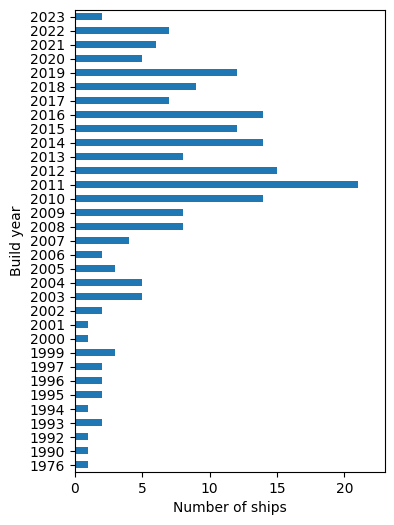

In [81]:
built_year_freq = df['built_year'].value_counts().sort_index()

#built_year_freq.plot.hist(bins=len(built_year_freq), figsize=(10, 8))
built_year_freq.plot.barh(figsize=(4, 6), xlabel='Number of ships', ylabel='Build year').set_xlim(0, built_year_freq.max()+2)

Text(0, 0.5, 'Dead Weight Tonnage (t)')

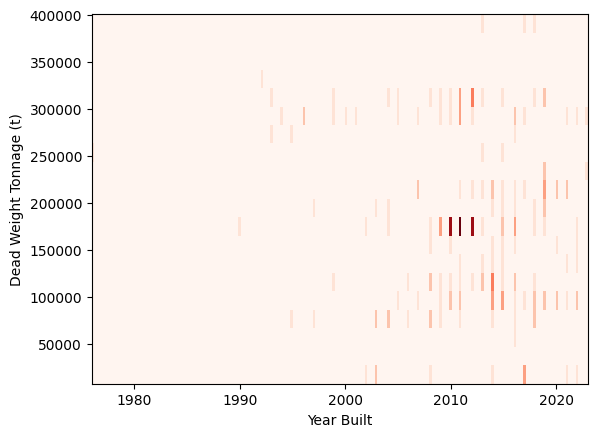

In [84]:
x_arr = df['built_year'].to_numpy()
y_arr = df['dwt'].to_numpy()

plt.hist2d(x_arr, y_arr, bins=(len(x_arr), 20), cmap=plt.cm.Reds)
plt.xlabel('Year Built')
plt.ylabel('Dead Weight Tonnage (t)')

## 1. Task 1b (Iris dataset)

In [12]:
iris_df = pd.read_csv('IRIS.csv')

iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


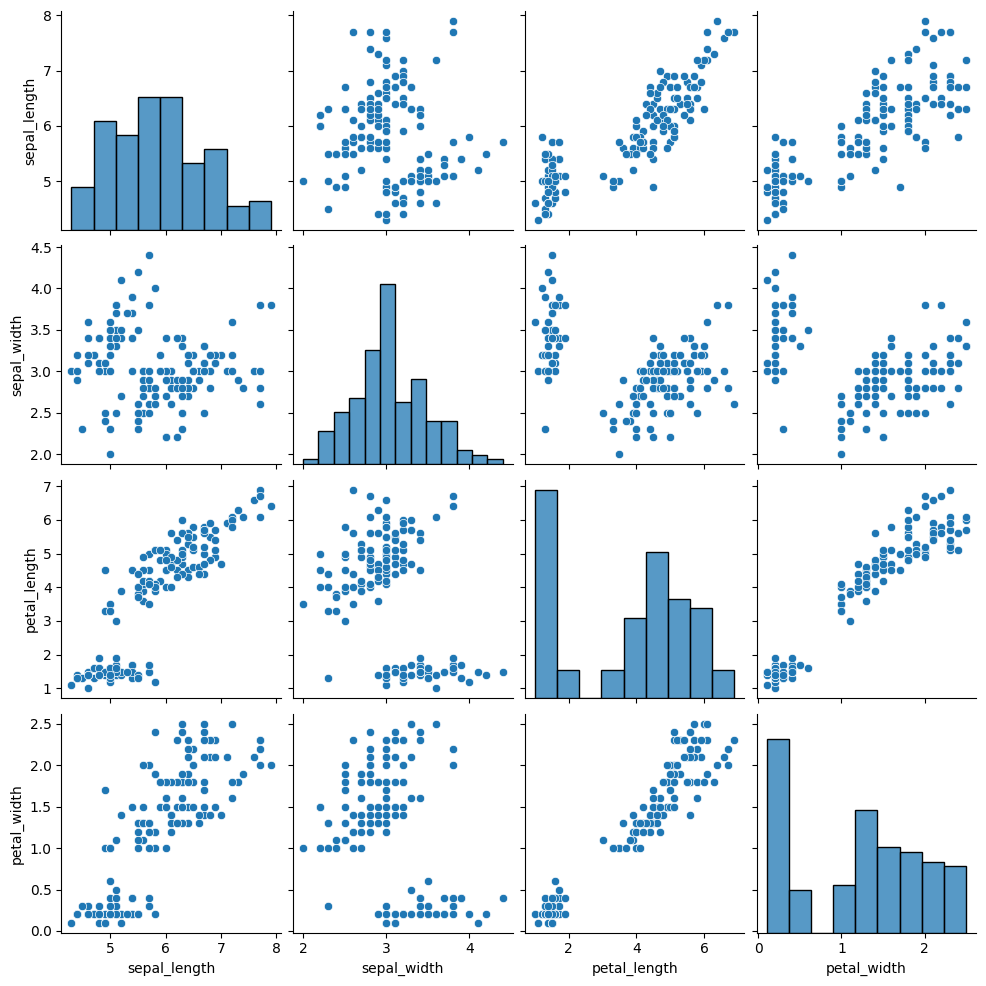

In [18]:
sb.pairplot(iris_df)

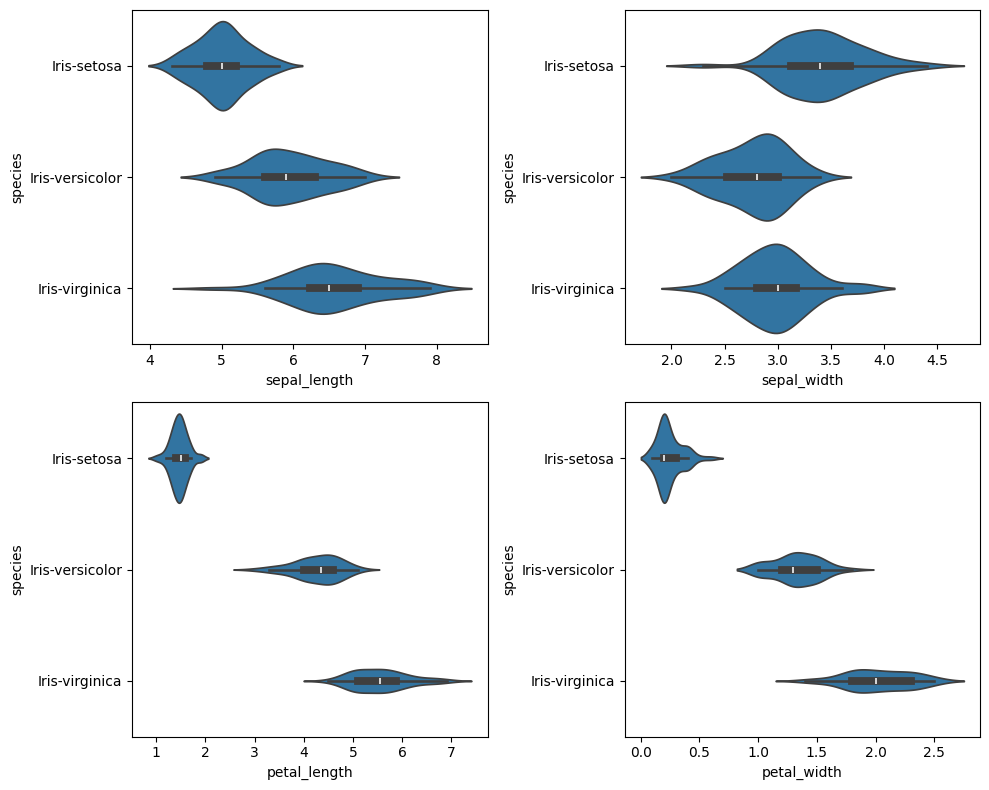

In [21]:
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

sb.violinplot(data=iris_df, x="sepal_length", y="species", ax=axes[0,0])
sb.violinplot(data=iris_df, x="sepal_width", y="species", ax=axes[0,1])
sb.violinplot(data=iris_df, x="petal_length", y="species", ax=axes[1,0])
sb.violinplot(data=iris_df, x="petal_width", y="species", ax=axes[1,1])

plt.tight_layout()
plt.show()

## 2. Task 2

In [25]:
fortnite_df = pd.read_csv('fortnite.csv')

fortnite_df.head()

,Date,Time of Day,Placed,Mental State,Eliminations,Assists,Revives,Accuracy,Hits,Head Shots,Distance Traveled,Materials Gathered,Materials Used,Damage Taken,Damage to Players,Damage to Structures
0,4/10,6:00 PM,27,sober,2,0,0,23%,14,2,271.08,20,20,272,331,621
1,4/10,6:00 PM,45,sober,1,2,0,30%,19,1,396.73,123,30,247,444,998
2,4/10,6:00 PM,38,high,3,0,0,30%,32,1,607.80,71,60,176,322,1109
3,4/10,7:00 PM,30,high,1,3,0,18%,19,1,714.16,244,10,238,330,4726
4,4/10,7:00 PM,16,high,3,1,1,58%,42,18,1140.00,584,150,365,668,2070


sober    0.274000
high     0.245238
dtype: float64


<Axes: xlabel='Mental state', ylabel='Accuracy %'>

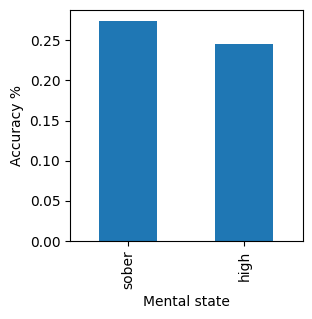

In [30]:
sober_subset = fortnite_df['Accuracy'].where(fortnite_df['Mental State'] == 'sober').dropna()
high_subset = fortnite_df['Accuracy'].where(fortnite_df['Mental State'] == 'high').dropna()


avg_acc_sober = 0
avg_acc_high = 0
for val in sober_subset:
    avg_acc_sober += int(val[:-1]) / 100
for val in high_subset:
    avg_acc_high += int(val[:-1]) / 100
avg_acc_sober /= len(sober_subset)
avg_acc_high /= len(high_subset)



mental_data = {'sober': avg_acc_sober, 'high': avg_acc_high}

mental_series = pd.Series(mental_data)
print(mental_series)

mental_series.plot.bar(figsize=(3,3), xlabel="Mental state", ylabel="Accuracy %")

This shows that when being high, this person manages to still stay at almost the same level of accuracy

Text(0.5, 1.0, 'Elinimation distribution by materials used')

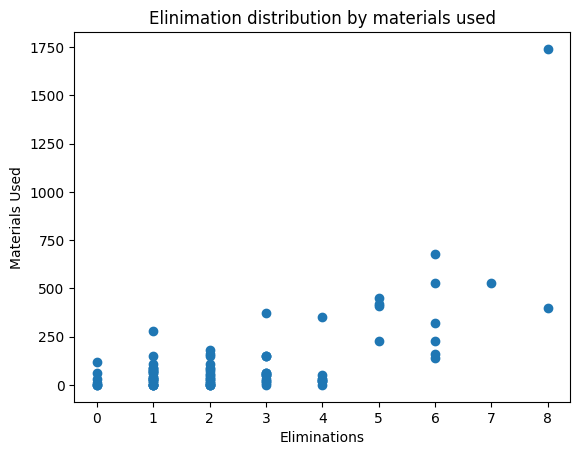

In [27]:
y_arr = fortnite_df['Materials Used'].to_numpy()
x_arr = fortnite_df['Eliminations'].to_numpy()


plt.scatter(x_arr, y_arr)
plt.xlabel("Eliminations")
plt.ylabel("Materials Used")
plt.title("Elinimation distribution by materials used")


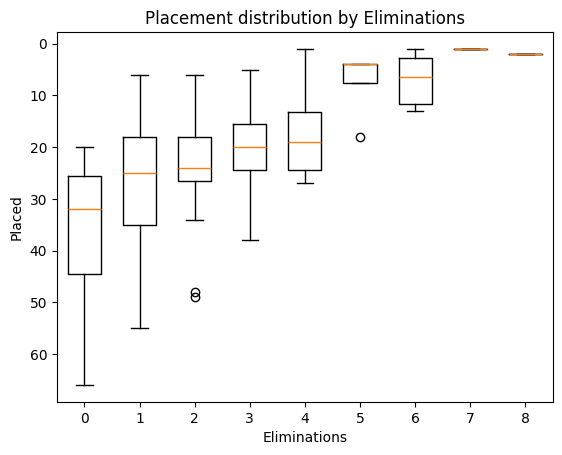

In [28]:
y_arr = fortnite_df['Placed'].to_numpy()
x_arr = fortnite_df['Eliminations'].to_numpy()

data = [y_arr[x_arr == i] for i in range(9)]

plt.boxplot(data, positions=range(9), widths=0.6)

plt.xlabel("Eliminations")
plt.ylabel("Placed")
plt.title("Placement distribution by Eliminations")
plt.xticks(range(9))
plt.gca().invert_yaxis() 
plt.show()
